In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('TravelInsurancePrediction.csv')
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
data.shape

(1987, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [6]:
data.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [7]:
data["TravelInsurance"] = data["TravelInsurance"].map({0: "Not Purchased", 1: "Purchased"})

Text(0.5, 1.0, 'Factors Affecting Purchase of Travel Insurance: Age')

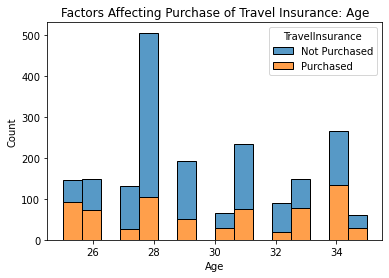

In [8]:
sns.histplot(data,x="Age",hue="TravelInsurance",multiple="stack")
plt.title("Factors Affecting Purchase of Travel Insurance: Age")

Text(0.5, 1.0, 'Factors Affecting Purchase of Travel Insurance: Employment Type')

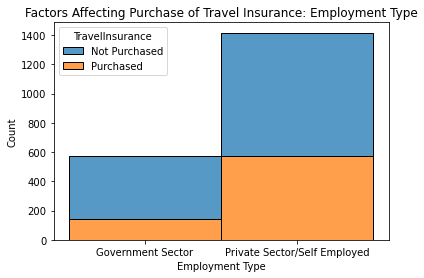

In [9]:
sns.histplot(data,x="Employment Type",hue="TravelInsurance",multiple="stack")
plt.title("Factors Affecting Purchase of Travel Insurance: Employment Type")

Text(0.5, 1.0, 'Factors Affecting Purchase of Travel Insurance: Annual Income')

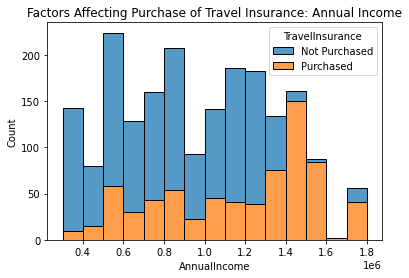

In [10]:
sns.histplot(data,x="AnnualIncome",hue="TravelInsurance",multiple="stack")
plt.title("Factors Affecting Purchase of Travel Insurance: Annual Income")

In [11]:
data["GraduateOrNot"] = data["GraduateOrNot"].map({"No": 0, "Yes": 1})
data["FrequentFlyer"] = data["FrequentFlyer"].map({"No": 0, "Yes": 1})
data["EverTravelledAbroad"] = data["EverTravelledAbroad"].map({"No": 0, "Yes": 1})

In [12]:
X=np.array(data[["Age", "GraduateOrNot","AnnualIncome", 
                 "FamilyMembers", "ChronicDiseases", 
                 "FrequentFlyer", "EverTravelledAbroad"]])
y = np.array(data[["TravelInsurance"]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred= dtc.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
metrics.accuracy_score(y_test,y_pred)

0.8190954773869347

In [19]:
cm = metrics.confusion_matrix(y_test,y_pred);cm

array([[119,  16],
       [ 20,  44]], dtype=int64)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf=RandomForestClassifier(n_estimators=300,random_state=0)

In [22]:
rf.fit(X_train,y_train)

<ipython-input-22-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=300, random_state=0)

In [23]:
y_pred=rf.predict(X_test)

In [24]:
metrics.accuracy_score(y_test,y_pred)

0.8391959798994975

In [25]:
cm = metrics.confusion_matrix(y_test,y_pred);cm

array([[125,  10],
       [ 22,  42]], dtype=int64)